In [ ]:
from google.colab import drive
drive.mount ('/content/drive')


In [ ]:
import os


In [ ]:
mypath = '/content/drive/My Drive/datamangrove'

In [ ]:
file_name = []
tag = []
full_path = []
for path, subdirs, files in os.walk(mypath):
    for name in files:
        full_path.append(os.path.join(path, name)) 
        tag.append(path.split('/')[-1])        
        file_name.append(name)


In [ ]:
import pandas as pd

In [ ]:
# memasukan variabel yang sudah dikumpulkan pada looping di atas menjadi sebuah dataframe agar rapih
df = pd.DataFrame({"path":full_path,'file_name':file_name,"tag":tag})
df.groupby(['tag']).size()

tag
avicennia_officinalis    100
rhizophora_apiculata     100
sonneratia_alba          100
dtype: int64

In [ ]:
#load library untuk train test split
from sklearn.model_selection import train_test_split


In [ ]:
#variabel yang digunakan pada pemisahan data ini
X= df['path']
y= df['tag']


In [ ]:
# split dataset awal menjadi data train dan test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=300)

In [ ]:
# kemudian data test dibagi menjadi 2 sehingga menjadi data test dan data validation.
X_test, X_val, y_test, y_val = train_test_split(
    X_test, y_test, test_size=0.5, random_state=100)

In [ ]:
# menyatukan kedalam masing-masing dataframe

df_tr = pd.DataFrame({'path':X_train
              ,'tag':y_train
             ,'set':'train'})

df_te = pd.DataFrame({'path':X_test
              ,'tag':y_test
             ,'set':'test'})

df_val = pd.DataFrame({'path':X_val
              ,'tag':y_val
             ,'set':'validation'})


In [ ]:
print('train size', len(df_tr))
print('val size', len(df_te))
print('test size', len(df_val))

train size 240
val size 30
test size 30


In [ ]:
# melihat proporsi pada masing masing set apakah sudah ok atau masih ada yang ingin diubah
df_all = df_tr.append([df_te,df_val]).reset_index(drop=1)\

print('===================================================== \n')
print(df_all.groupby(['set','tag']).size(),'\n')

print('===================================================== \n')

#cek sample datanya
df_all.sample(3)


set         tag                  
test        avicennia_officinalis    10
            rhizophora_apiculata     11
            sonneratia_alba           9
train       avicennia_officinalis    79
            rhizophora_apiculata     81
            sonneratia_alba          80
validation  avicennia_officinalis    11
            rhizophora_apiculata      8
            sonneratia_alba          11
dtype: int64 




,path,tag,set
164,/content/drive/My Drive/datamangrove/sonnerati...,sonneratia_alba,train
62,/content/drive/My Drive/datamangrove/rhizophor...,rhizophora_apiculata,train
80,/content/drive/My Drive/datamangrove/avicennia...,avicennia_officinalis,train


In [ ]:
df.head()

,path,file_name,tag
0,/content/drive/My Drive/datamangrove/avicennia...,avicennia_officinalis4.JPG,avicennia_officinalis
1,/content/drive/My Drive/datamangrove/avicennia...,avicennia_officinalis3.JPG,avicennia_officinalis
2,/content/drive/My Drive/datamangrove/avicennia...,avicennia_officinalis74.jpg,avicennia_officinalis
3,/content/drive/My Drive/datamangrove/avicennia...,avicennia_officinalis11.JPG,avicennia_officinalis
4,/content/drive/My Drive/datamangrove/avicennia...,avicennia_officinalis35.JPG,avicennia_officinalis


In [ ]:
import shutil
from tqdm.notebook import tqdm as tq


In [ ]:
    datasource_path = "/content/drive/My Drive/datamangrove/"
dataset_path = "dataset/"



In [ ]:
for index, row in tq(df_all.iterrows()):
    
    #detect filepath
    file_path = row['path']
    if os.path.exists(file_path) == False:
            file_path = os.path.join(datasource_path,row['tag'],row['image'].split('.')[0])            
    
    #make folder destination dirs
    if os.path.exists(os.path.join(dataset_path,row['set'],row['tag'])) == False:
        os.makedirs(os.path.join(dataset_path,row['set'],row['tag']))
    
    #define file dest
    destination_file_name = file_path.split('/')[-1]
    file_dest = os.path.join(dataset_path,row['set'],row['tag'],destination_file_name)
    
    #copy file from source to dest
    if os.path.exists(file_dest) == False:
        shutil.copy2(file_path,file_dest)


0it [00:00, ?it/s]

In [ ]:
import tensorflow as tf

In [ ]:
# Define Input Parameters
dim = (32, 32)
# dim = (456, 456)
channel = (3, )
input_shape = dim + channel

#batch size
batch_size = 16

#Epoch
epoch = 10

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [ ]:
train_generator = train_datagen.flow_from_directory('dataset/train/',
                                                    target_size=dim,
                                                    batch_size=batch_size,
                                                    class_mode='categorical',
                                                    shuffle=True)

val_generator = val_datagen.flow_from_directory('dataset/validation/',
                                                target_size=dim,
                                                batch_size=batch_size,
                                                class_mode='categorical',
                                                shuffle=True)

test_generator = test_datagen.flow_from_directory('dataset/test/',
                                                  target_size=dim,
                                                  batch_size=batch_size,
                                                  class_mode='categorical',
                                                  shuffle=True)

num_class = test_generator.num_classes
labels = train_generator.class_indices.keys()

Found 240 images belonging to 3 classes.
Found 30 images belonging to 3 classes.
Found 30 images belonging to 3 classes.


In [ ]:
print(labels)

dict_keys(['avicennia_officinalis', 'rhizophora_apiculata', 'sonneratia_alba'])


In [ ]:
import numpy as np # linear algebra
from sklearn.metrics import accuracy_score, f1_score, precision_score, confusion_matrix
from sklearn.model_selection import StratifiedKFold
from PIL import Image
import random
#Dependencies
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession
import warnings
import os
import shutil
from PIL import ImageFile
warnings.simplefilter('error', Image.DecompressionBombWarning)
ImageFile.LOAD_TRUNCATED_IMAGES = True
from PIL import Image
Image.MAX_IMAGE_PIXELS = 1000000000

config = ConfigProto()
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

In [ ]:
datasetFolderName='dataset/'
MODEL_FILENAME="SAVEMODEL/project/model.h5"
sourceFiles=[]
classLabels=['avicennia_officinalis', 'rhizophora_apiculata', 'sonneratia_alba']
def transferBetweenFolders(source, dest, splitRate):   
    global sourceFiles
    sourceFiles=os.listdir(source)
    if(len(sourceFiles)!=0):
        transferFileNumbers=int(len(sourceFiles)*splitRate)
        transferIndex=random.sample(range(0, len(sourceFiles)), transferFileNumbers)
        for eachIndex in transferIndex:
            shutil.move(source+str(sourceFiles[eachIndex]), dest+str(sourceFiles[eachIndex]))
    else:
        print("No file moved. Source empty!")
        
def transferAllClassBetweenFolders(source, dest, splitRate):
    for label in classLabels:
        transferBetweenFolders(datasetFolderName+'/'+source+'/'+label+'/', 
                               datasetFolderName+'/'+dest+'/'+label+'/', 
                               splitRate)


# First, check if test folder is empty or not, if not transfer all existing files to train
transferAllClassBetweenFolders('test', 'train', 1.0)
# Now, split some part of train data into the test folders.
transferAllClassBetweenFolders('train', 'test', 0.20)


X=[]
Y=[]

def prepareNameWithLabels(folderName):
    sourceFiles=os.listdir(datasetFolderName+'/train/'+folderName)
    for val in sourceFiles:
        X.append(val)
        if(folderName==classLabels[0]):
            Y.append(0)
        else:
            Y.append(1)

# Organize file names and class labels in X and Y variables
prepareNameWithLabels(classLabels[0])
prepareNameWithLabels(classLabels[1])        

X=np.asarray(X)
Y=np.asarray(Y)

In [ ]:
batch_size = 16
epoch=200
activationFunction='relu'
def getModel():
    model = Sequential()
    model.add(Conv2D(32, (5, 5), padding='same', strides=(1,1), activation=activationFunction, input_shape=(input_shape)))
    model.add(Conv2D(32, (5, 5), activation=activationFunction))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.5))
 
    model.add(Conv2D(64, (5, 5), padding='same', strides=(1,1), activation=activationFunction))
    model.add(Conv2D(64, (5, 5), activation=activationFunction))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.5))
 
    model.add(Flatten())
    model.add(Dense(256, activation=activationFunction))
    model.add(Dropout(0.5))
    model.add(Dense(len(classLabels), activation='softmax')) 

    opt = keras.optimizers.Adam(learning_rate = 0.0001)
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    
    return model


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
def my_metrics(y_true, y_pred):
    accuracy=accuracy_score(y_true, y_pred)
    precision=precision_score(y_true, y_pred,average='weighted')
    f1Score=f1_score(y_true, y_pred, average='weighted') 
    print("Accuracy  : {}".format(accuracy))
    print("Precision : {}".format(precision))
    print("f1Score : {}".format(f1Score))
    cm=confusion_matrix(y_true, y_pred)
    print(cm)
    return accuracy, precision, f1Score

In [ ]:
train_path=datasetFolderName+'/train/'
validation_path=datasetFolderName+'/validation/'
test_path=datasetFolderName+'/test/'
model=getModel()

In [ ]:
skf = StratifiedKFold(n_splits=5, shuffle=True)
skf.get_n_splits(X, Y)
foldNum=0
for train_index, val_index in skf.split(X, Y):
    transferAllClassBetweenFolders('validation', 'train', 1.0)
    foldNum+=1
    print("Results for fold",foldNum)
    X_train, X_val = X[train_index], X[val_index]
    Y_train, Y_val = Y[train_index], Y[val_index]

    for eachIndex in range(len(X_val)):
        classLabel=''
        if(Y_val[eachIndex]==0):
            classLabel=classLabels[0]
        elif(Y_val[eachIndex]==1):
            classLabel=classLabels[1]
        else:
            classLabel=classLabels[2]   

        shutil.move(datasetFolderName+'/train/'+classLabel+'/'+X_val[eachIndex], 
                    datasetFolderName+'/validation/'+classLabel+'/'+X_val[eachIndex])

    #Augmentasi Citra    
    train_datagen = ImageDataGenerator(
                rescale=1./255,
                rotation_range=40,
                width_shift_range=0.25,
                height_shift_range=0.25,
                shear_range=0.20,
        		    zoom_range=0.20,
                horizontal_flip=True,
               	fill_mode="nearest"
                )
    validation_datagen = ImageDataGenerator(rescale=1./255)
    test_datagen = ImageDataGenerator(rescale=1./255)
        
    train_generator = train_datagen.flow_from_directory(
        train_path,
        target_size=(32,32),
        batch_size=batch_size,
        class_mode='categorical',
        subset='training')

    validation_generator = validation_datagen.flow_from_directory(
            validation_path,
            target_size=(32,32),
            batch_size=batch_size,
            class_mode=None,  
            shuffle=False)   
   
    history=model.fit_generator(train_generator, 
                        epochs=epoch)
    
    predictions = model.predict_generator(validation_generator, verbose=1)
    yPredictions = np.argmax(predictions, axis=1)
    true_classes = validation_generator.classes
    # evaluate validation performance
    print("***Performance on Validation data***")    
    valAcc, valPrec, valFScore = my_metrics(true_classes, yPredictions)

Results for fold 1
Found 204 images belonging to 3 classes.
Found 44 images belonging to 3 classes.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:56: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.


Epoch 1/200
13/13 [==============================] - 18s 691ms/step - loss: 1.1029 - accuracy: 0.3578
Epoch 2/200
13/13 [==============================] - 9s 721ms/step - loss: 1.1000 - accuracy: 0.3676
Epoch 3/200
13/13 [==============================] - 9s 725ms/step - loss: 1.0916 - accuracy: 0.3725
Epoch 4/200
13/13 [==============================] - 9s 712ms/step - loss: 1.0917 - accuracy: 0.3873
Epoch 5/200
13/13 [==============================] - 9s 699ms/step - loss: 1.0881 - accuracy: 0.3971
Epoch 6/200
13/13 [==============================] - 9s 708ms/step - loss: 1.0953 - accuracy: 0.3529
Epoch 7/200
13/13 [==============================] - 9s 716ms/step - loss: 1.0795 - accuracy: 0.3922
Epoch 8/200
13/13 [==============================] - 9s 715ms/step - loss: 1.0771 - accuracy: 0.3529
Epoch 9/200
13/13 [==============================] - 9s 722ms/step - loss: 1.0755 - accuracy: 0.4265
Epoch 10/200
13/13 [==============================] - 9s 713ms/step - loss: 1.0386 - accur

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.


3/3 [==============================] - 2s 667ms/step
***Performance on Validation data***
Accuracy  : 0.8636363636363636
Precision : 0.8755411255411254
f1Score : 0.8650941534954074
[[14  1  0]
 [ 3 12  0]
 [ 1  1 12]]
Results for fold 2
Found 204 images belonging to 3 classes.
Found 44 images belonging to 3 classes.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:56: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.


Epoch 1/200
13/13 [==============================] - 9s 715ms/step - loss: 0.2923 - accuracy: 0.8627
Epoch 2/200
13/13 [==============================] - 9s 702ms/step - loss: 0.3828 - accuracy: 0.8529
Epoch 3/200
13/13 [==============================] - 9s 718ms/step - loss: 0.2986 - accuracy: 0.9118
Epoch 4/200
13/13 [==============================] - 9s 721ms/step - loss: 0.2371 - accuracy: 0.9216
Epoch 5/200
13/13 [==============================] - 9s 706ms/step - loss: 0.2928 - accuracy: 0.9020
Epoch 6/200
13/13 [==============================] - 9s 722ms/step - loss: 0.2485 - accuracy: 0.9167
Epoch 7/200
13/13 [==============================] - 10s 725ms/step - loss: 0.2618 - accuracy: 0.8971
Epoch 8/200
13/13 [==============================] - 9s 730ms/step - loss: 0.2136 - accuracy: 0.9216
Epoch 9/200
13/13 [==============================] - 10s 725ms/step - loss: 0.3062 - accuracy: 0.8529
Epoch 10/200
13/13 [==============================] - 10s 741ms/step - loss: 0.2168 - acc

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.


3/3 [==============================] - 2s 521ms/step
***Performance on Validation data***
Accuracy  : 0.9318181818181818
Precision : 0.9362689393939394
f1Score : 0.9317369226991029
[[15  0  0]
 [ 1 13  0]
 [ 0  2 13]]
Results for fold 3
Found 204 images belonging to 3 classes.
Found 44 images belonging to 3 classes.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:56: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.


Epoch 1/200
13/13 [==============================] - 9s 683ms/step - loss: 0.1280 - accuracy: 0.9608
Epoch 2/200
13/13 [==============================] - 9s 680ms/step - loss: 0.2614 - accuracy: 0.9020
Epoch 3/200
13/13 [==============================] - 9s 708ms/step - loss: 0.1304 - accuracy: 0.9657
Epoch 4/200
13/13 [==============================] - 9s 711ms/step - loss: 0.1996 - accuracy: 0.9216
Epoch 5/200
13/13 [==============================] - 9s 716ms/step - loss: 0.2428 - accuracy: 0.9216
Epoch 6/200
13/13 [==============================] - 9s 714ms/step - loss: 0.1700 - accuracy: 0.9314
Epoch 7/200
13/13 [==============================] - 9s 715ms/step - loss: 0.2297 - accuracy: 0.9314
Epoch 8/200
13/13 [==============================] - 9s 700ms/step - loss: 0.1665 - accuracy: 0.9461
Epoch 9/200
13/13 [==============================] - 9s 699ms/step - loss: 0.1507 - accuracy: 0.9510
Epoch 10/200
13/13 [==============================] - 9s 699ms/step - loss: 0.1549 - accura

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.


3/3 [==============================] - 2s 627ms/step
***Performance on Validation data***
Accuracy  : 1.0
Precision : 1.0
f1Score : 1.0
[[14  0  0]
 [ 0 15  0]
 [ 0  0 15]]
Results for fold 4
Found 205 images belonging to 3 classes.
Found 43 images belonging to 3 classes.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:56: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.


Epoch 1/200
13/13 [==============================] - 9s 712ms/step - loss: 0.0769 - accuracy: 0.9805
Epoch 2/200
13/13 [==============================] - 9s 729ms/step - loss: 0.0696 - accuracy: 0.9756
Epoch 3/200
13/13 [==============================] - 9s 696ms/step - loss: 0.1334 - accuracy: 0.9415
Epoch 4/200
13/13 [==============================] - 9s 699ms/step - loss: 0.2037 - accuracy: 0.9268
Epoch 5/200
13/13 [==============================] - 9s 712ms/step - loss: 0.1323 - accuracy: 0.9512
Epoch 6/200
13/13 [==============================] - 9s 701ms/step - loss: 0.1300 - accuracy: 0.9561
Epoch 7/200
13/13 [==============================] - 9s 698ms/step - loss: 0.1529 - accuracy: 0.9415
Epoch 8/200
13/13 [==============================] - 9s 695ms/step - loss: 0.0816 - accuracy: 0.9805
Epoch 9/200
13/13 [==============================] - 9s 711ms/step - loss: 0.1040 - accuracy: 0.9707
Epoch 10/200
13/13 [==============================] - 9s 712ms/step - loss: 0.1027 - accura

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.


3/3 [==============================] - 2s 576ms/step
***Performance on Validation data***
Accuracy  : 0.9767441860465116
Precision : 0.9782945736434108
f1Score : 0.9767144851346937
[[14  0  0]
 [ 0 15  0]
 [ 1  0 13]]
Results for fold 5
Found 205 images belonging to 3 classes.
Found 43 images belonging to 3 classes.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:56: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.


Epoch 1/200
13/13 [==============================] - 9s 691ms/step - loss: 0.1204 - accuracy: 0.9561
Epoch 2/200
13/13 [==============================] - 9s 693ms/step - loss: 0.1177 - accuracy: 0.9659
Epoch 3/200
13/13 [==============================] - 9s 707ms/step - loss: 0.1008 - accuracy: 0.9756
Epoch 4/200
13/13 [==============================] - 9s 676ms/step - loss: 0.1083 - accuracy: 0.9659
Epoch 5/200
13/13 [==============================] - 9s 679ms/step - loss: 0.0734 - accuracy: 0.9805
Epoch 6/200
13/13 [==============================] - 9s 682ms/step - loss: 0.0529 - accuracy: 0.9854
Epoch 7/200
13/13 [==============================] - 9s 698ms/step - loss: 0.0591 - accuracy: 0.9756
Epoch 8/200
13/13 [==============================] - 9s 683ms/step - loss: 0.0441 - accuracy: 0.9902
Epoch 9/200
13/13 [==============================] - 9s 680ms/step - loss: 0.0440 - accuracy: 0.9805
Epoch 10/200
13/13 [==============================] - 9s 682ms/step - loss: 0.0404 - accura

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.


3/3 [==============================] - 2s 653ms/step
***Performance on Validation data***
Accuracy  : 1.0
Precision : 1.0
f1Score : 1.0
[[14  0  0]
 [ 0 15  0]
 [ 0  0 14]]


In [ ]:
qqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqq# =============TESTING=============
print("==============TEST RESULTS============")                                                                
test_generator = test_datagen.flow_from_directory(
        test_path,
        target_size=(32, 32),
        batch_size=batch_size,
        class_mode=None,
        shuffle=False) 
predictions = model.predict(test_generator, verbose=1)
yPredictions = np.argmax(predictions, axis=1)
true_classes = test_generator.classes

testAcc,testPrec, testFScore = my_metrics(true_classes, yPredictions)
model.save(MODEL_FILENAME)

==============TEST RESULTS============
Found 52 images belonging to 3 classes.
4/4 [==============================] - 5s 1s/step
Accuracy  : 0.9615384615384616
Precision : 0.9615384615384616
f1Score : 0.9615384615384616
[[16  1  0]
 [ 1 17  0]
 [ 0  0 17]]


In [ ]:
print('confusion matrix')
print(confusion_matrix(true_classes, yPredictions))

confusion matrix
[[16  1  0]
 [ 1 17  0]
 [ 0  0 17]]


Classification Report
                       precision    recall  f1-score   support

avicennia_officinalis       0.94      0.94      0.94        17
 rhizophora_apiculata       0.94      0.94      0.94        18
      sonneratia_alba       1.00      1.00      1.00        17

             accuracy                           0.96        52
            macro avg       0.96      0.96      0.96        52
         weighted avg       0.96      0.96      0.96        52



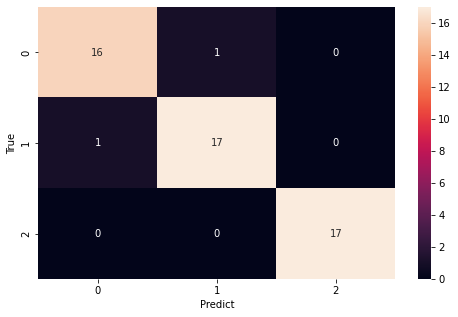

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report

target_names = ['avicennia_officinalis', 'rhizophora_apiculata', 'sonneratia_alba']
print('Classification Report')
print(classification_report(true_classes, yPredictions, target_names=target_names))
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(true_classes, yPredictions), annot=True, fmt=".0f", ax=ax)
plt.xlabel("Predict")
plt.ylabel("True")
plt.show()

In [ ]:
import os
import requests
from io import BytesIO

from PIL import Image
import numpy as np

In [ ]:
input_size = (32, 32)
channel = (3,)
input_shape = input_size + channel

labels = ['avicennia_officinalis', 'rhizophora_apiculata', 'sonneratia_alba']


In [ ]:
def preprocess(img,input_size):
    nimg = img.convert('RGB').resize(input_size, resample= 0)
    img_arr = (np.array(nimg))/255
    return img_arr

def reshape(imgs_arr):
    return np.stack(imgs_arr, axis=0)


In [ ]:
from tensorflow.keras.models import load_model
MODEL_PATH = '/content/SAVEMODEL/project/model.h5'
model = load_model(MODEL_PATH,compile=False)


In [ ]:
# read image
im = Image.open('/content/drive/My Drive/prediksi/tes 1.JPG')
X = preprocess(im,input_size)
X = reshape([X])
y = model.predict(X)

print( labels[np.argmax(y)], np.max(y) )

# read image
im = Image.open('/content/drive/My Drive/prediksi/tes 2.JPG')
X = preprocess(im,input_size)
X = reshape([X])
y = model.predict(X)

print( labels[np.argmax(y)], np.max(y) )

# read image
im = Image.open('/content/drive/My Drive/prediksi/tes 3.JPG')
X = preprocess(im,input_size)
X = reshape([X])
y = model.predict(X)

print( labels[np.argmax(y)], np.max(y) )

# read image
im = Image.open('/content/drive/My Drive/prediksi/tes 4.JPG')
X = preprocess(im,input_size)
X = reshape([X])
y = model.predict(X)

print( labels[np.argmax(y)], np.max(y) )

# read image
im = Image.open('/content/drive/My Drive/prediksi/tes 5.JPG')
X = preprocess(im,input_size)
X = reshape([X])
y = model.predict(X)

print( labels[np.argmax(y)], np.max(y) )

# read image
im = Image.open('/content/drive/My Drive/prediksi/tes 6.JPG')
X = preprocess(im,input_size)
X = reshape([X])
y = model.predict(X)

print( labels[np.argmax(y)], np.max(y) )

# read image
im = Image.open('/content/drive/My Drive/prediksi/tes 7.JPG')
X = preprocess(im,input_size)
X = reshape([X])
y = model.predict(X)

print( labels[np.argmax(y)], np.max(y) )

# read image
im = Image.open('/content/drive/My Drive/prediksi/tes 8.JPG')
X = preprocess(im,input_size)
X = reshape([X])
y = model.predict(X)

print( labels[np.argmax(y)], np.max(y) )

# read image
im = Image.open('/content/drive/My Drive/prediksi/tes 9.JPG')
X = preprocess(im,input_size)
X = reshape([X])
y = model.predict(X)

print( labels[np.argmax(y)], np.max(y) )

# read image
im = Image.open('/content/drive/My Drive/prediksi/tes 10.JPG')
X = preprocess(im,input_size)
X = reshape([X])
y = model.predict(X)

print( labels[np.argmax(y)], np.max(y) )

# read image
im = Image.open('/content/drive/My Drive/prediksi/tes 11.JPG')
X = preprocess(im,input_size)
X = reshape([X])
y = model.predict(X)

print( labels[np.argmax(y)], np.max(y) )

# read image
im = Image.open('/content/drive/My Drive/prediksi/tes 12.JPG')
X = preprocess(im,input_size)
X = reshape([X])
y = model.predict(X)

print( labels[np.argmax(y)], np.max(y) )

# read image
im = Image.open('/content/drive/My Drive/prediksi/tes 13.JPG')
X = preprocess(im,input_size)
X = reshape([X])
y = model.predict(X)

print( labels[np.argmax(y)], np.max(y) )

# read image
im = Image.open('/content/drive/My Drive/prediksi/tes 14.JPG')
X = preprocess(im,input_size)
X = reshape([X])
y = model.predict(X)

print( labels[np.argmax(y)], np.max(y) )

# read image
im = Image.open('/content/drive/My Drive/prediksi/tes 15.JPG')
X = preprocess(im,input_size)
X = reshape([X])
y = model.predict(X)

print( labels[np.argmax(y)], np.max(y) )


avicennia_officinalis 0.99999774
avicennia_officinalis 0.9999926
avicennia_officinalis 0.9977087
avicennia_officinalis 0.9999957
avicennia_officinalis 0.9996848
rhizophora_apiculata 1.0
rhizophora_apiculata 0.5116783
rhizophora_apiculata 0.99426335
rhizophora_apiculata 0.99887484
rhizophora_apiculata 0.91401005
sonneratia_alba 0.99954575
sonneratia_alba 0.9932446
sonneratia_alba 0.9999995
sonneratia_alba 0.9931375
sonneratia_alba 0.99772805
